# Visualisation of age estimation distribution for all data sets


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

# Set the working directory to the src folder
os.chdir('/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data')


### Loading data

In [60]:
# def load_data(path):
#     f = open(path)
#     data = json.load(f)
#     df = pd.DataFrame.from_dict(data, orient='index', columns=['Age'])
#     f.close()

#     # removing nans
#     nans = df['Age'].isna().sum()
#     df = df.dropna()

#     describe = df.describe()
#     value_counts = df.value_counts()

#     # make new column for the identity based on the index
#     df['index_full'] = df.index
#     df['Identity'] = df.index
#     df['Identity'] = df.index.str.rsplit('_', 1).str[0]




#     df = df.sort_values(by='Age')

#     df['Ethnicity'] = df['Identity'].str.split('_').str[0]

#     return df, nans, describe, value_counts
import pandas as pd
import json

def load_data(path):
    with open(path) as f:
        data = json.load(f)
        df = pd.DataFrame.from_dict(data, orient='index', columns=['Age'])

    # Remove rows with NaN in 'Age' and count them
    nans = df['Age'].isna().sum()
    df = df.dropna()

    # Statistical description and value counts for 'Age'
    describe = df.describe()
    value_counts = df['Age'].value_counts()

    # Full index and Identity extraction
    df['index_full'] = df.index
    df['Identity'] = df.index.str.rsplit('_', 1).str[0]

    # Sorting by 'Age'
    df = df.sort_values(by='Age')

    # Ethnicity extraction
    df['Ethnicity'] = df['Identity'].str.split('_').str[0]

    # Image ID extraction
    df['image_id'] = df['index_full'].str.split('_').str[-1]

    # Remove duplicates if any
    df = df.drop_duplicates()

    return df, nans, describe, value_counts


In [61]:
df_YLFW = load_data('age_estimations/YLFW_output_data_precroped_all_age.json')[0]
df_YLFW.Age = df_YLFW.Age.astype(int)
df_YLFW = df_YLFW.sort_values(by='Age', ascending=True)

df_RFW_african = load_data('age_estimations/data sendt fra Gabi senest/output_african.json')[0]
df_RFW_asian = load_data('age_estimations/data sendt fra Gabi senest/output_asian.json')[0]
df_RFW_caucasian = load_data('age_estimations/data sendt fra Gabi senest/output_caucasian.json')[0]
df_RFW_indian = load_data('age_estimations/data sendt fra Gabi senest/output_indian.json')[0]
df_RFW = pd.concat([df_RFW_african, df_RFW_asian, df_RFW_caucasian, df_RFW_indian],ignore_index=True)
df_RFW.Age = df_RFW.Age.astype(int)
df_RFW = df_RFW.sort_values(by='Age', ascending=True)


In [62]:
display(df_RFW)

,Age,index_full,Identity,Ethnicity,image_id
20264,2,m.0263vl0_0001,m.0263vl0,m.0263vl0,0001
30267,2,m.0gc2zgn_0001,m.0gc2zgn,m.0gc2zgn,0001
22532,3,m.018fwb_0003,m.018fwb,m.018fwb,0003
32250,3,m.03qcz13_0003,m.03qcz13,m.03qcz13,0003
16477,4,m.026m8l2_0001,m.026m8l2,m.026m8l2,0001
...,...,...,...,...,...
19989,87,m.04jmjyy_0001,m.04jmjyy,m.04jmjyy,0001
19990,87,m.07ssfl_0002,m.07ssfl,m.07ssfl,0002
30153,87,m.09v5jqn_0004,m.09v5jqn,m.09v5jqn,0004
40447,88,m.09tbzt_0003,m.09tbzt,m.09tbzt,0003


In [47]:
# ethnicity on RFW

# Define the path to the raw data directory
raw_data_path = '../data/raw_full/'

# Initialize lists to store image characteristics
img_names = []
ethnicities = []
face_ids = []
id_class = []

# Iterate through the directories of each ethnicity (e.g., 'Asian')
ethnicities_list = os.listdir(raw_data_path + 'RFW_full/data')
for ethnicity in ethnicities_list:
    ethnicity_dir = os.path.join(raw_data_path + 'RFW_full/data', ethnicity)
    if os.path.isdir(ethnicity_dir): # indside dir
        id_list = os.listdir(ethnicity_dir) # get ids
        for id_name in id_list:
            id = id_name.split('.')[1]
            # print(id_name)

            ids_dir = os.path.join(ethnicity_dir, id_name)
            if os.path.isdir(ids_dir):
                for img_name in os.listdir(ids_dir):
                    if img_name.endswith('.jpg'):
                        # Extract information from image filename
                        image_name = os.path.splitext(img_name)[0]
                        image_info = image_name.split('_')
                        image_id = image_info[-1]

                        # Append image characteristics to lists
                        img_names.append(id_name)
                        ethnicities.append(ethnicity)
                        face_ids.append(image_id)
                        id_class.append(id)



# Create a DataFrame from the lists
data = {'img_name': img_names, 'ethnicity': ethnicities, 'id_class':id_class, 'face_id': face_ids}
df = pd.DataFrame(data)


In [63]:
import os
import pandas as pd

def create_ethnicity_dataframe(raw_data_path):
    # Initialize lists to store image characteristics
    img_names = []
    ethnicities = []
    face_ids = []
    id_class = []

    # Make sure the path ends with a '/'
    if not raw_data_path.endswith('/'):
        raw_data_path += '/'

    # Check if the RFW_full/data directory exists within the given path
    if not os.path.exists(raw_data_path + 'RFW_full/data'):
        print(f"The directory {raw_data_path}RFW_full/data does not exist.")
        return None

    # Iterate through the directories of each ethnicity (e.g., 'Asian')
    ethnicities_list = os.listdir(raw_data_path + 'RFW_full/data')
    for ethnicity in ethnicities_list:
        ethnicity_dir = os.path.join(raw_data_path + 'RFW_full/data', ethnicity)
        if os.path.isdir(ethnicity_dir): # inside dir
            id_list = os.listdir(ethnicity_dir) # get ids
            for id_name in id_list:
                id = id_name.split('.')[1]

                ids_dir = os.path.join(ethnicity_dir, id_name)
                if os.path.isdir(ids_dir):
                    for img_name in os.listdir(ids_dir):
                        if img_name.endswith('.jpg'):
                            # Extract information from image filename
                            image_name = os.path.splitext(img_name)[0]
                            image_info = image_name.split('_')
                            image_id = image_info[-1]

                            # Append image characteristics to lists
                            img_names.append(id_name)
                            ethnicities.append(ethnicity)
                            face_ids.append(image_id)
                            id_class.append(id)

    # Create a DataFrame from the lists
    data = {'img_name': img_names, 'ethnicity': ethnicities, 'id_class': id_class, 'face_id': face_ids}
    df = pd.DataFrame(data)
    return df
raw_data_path = '../data/raw_full/'
df_ethnicity = create_ethnicity_dataframe(raw_data_path)


# trying to add the ages to the df instead 

In [64]:
df_ethnicity

,img_name,ethnicity,id_class,face_id
0,m.010lz5,African,010lz5,0001
1,m.010lz5,African,010lz5,0002
2,m.010lz5,African,010lz5,0003
3,m.011y5k,African,011y5k,0001
4,m.011y5k,African,011y5k,0002
...,...,...,...,...
40602,m.0vshsz9,Indian,0vshsz9,0003
40603,m.0_4pw,Indian,0_4pw,0001
40604,m.0_4pw,Indian,0_4pw,0002
40605,m.0_4pw,Indian,0_4pw,0003


In [65]:
# merge based on match between df_ethnicity.img_name and df_RFW.Identity and df_ethnicity.face_id and df_RFW.image_id

import pandas as pd

def merge_on_multiple_columns(df_ethnicity, df_RFW):
    """
    Merges df_ethnicity and df_RFW DataFrames based on matching 'img_name' with 'Identity'
    and 'face_id' with 'image_id'.

    Parameters:
    df_ethnicity: DataFrame containing 'img_name' and 'face_id' columns.
    df_RFW: DataFrame containing 'Identity' and 'image_id' columns.

    Returns:
    merged_df: The resulting DataFrame after the merge.
    """
    # Merge the DataFrames based on matches between 'img_name' and 'Identity',
    # as well as 'face_id' and 'image_id'
    merged_df = pd.merge(df_ethnicity, df_RFW,
                         left_on=['img_name', 'face_id'],
                         right_on=['Identity', 'image_id'],
                         how='inner')

    return merged_df

# Example usage:
# Assuming you have the df_ethnicity and df_RFW as defined DataFrames:
merged_df = merge_on_multiple_columns(df_ethnicity, df_RFW)


In [67]:
df_RFW = merged_df.copy()

In [68]:
# drop Ethnicity column and rename ethnicity to Ethnicity

df_RFW = df_RFW.drop(columns=['Ethnicity','id_class','img_name'])
df_RFW =df_RFW.rename(columns={"ethnicity":"Ethnicity"})


In [69]:
df_RFW

,Ethnicity,face_id,Age,index_full,Identity,image_id
0,African,0001,38,m.010lz5_0001,m.010lz5,0001
1,African,0002,29,m.010lz5_0002,m.010lz5,0002
2,African,0003,37,m.010lz5_0003,m.010lz5,0003
3,African,0001,40,m.011y5k_0001,m.011y5k,0001
4,African,0002,43,m.011y5k_0002,m.011y5k,0002
...,...,...,...,...,...,...
40517,Indian,0003,25,m.0vshsz9_0003,m.0vshsz9,0003
40518,Indian,0001,38,m.0_4pw_0001,m.0_4pw,0001
40519,Indian,0002,64,m.0_4pw_0002,m.0_4pw,0002
40520,Indian,0003,37,m.0_4pw_0003,m.0_4pw,0003


# How many of each identity

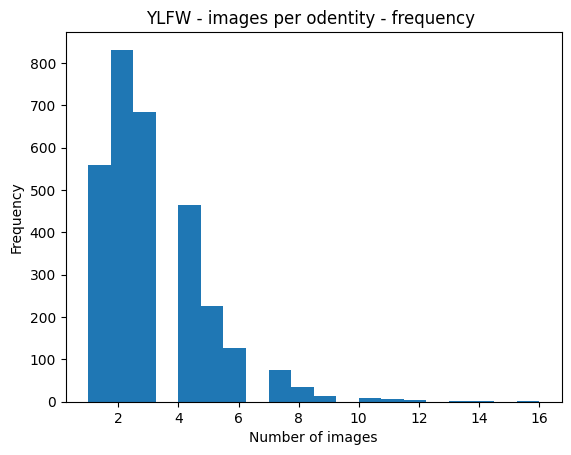

In [70]:
df_YLFW['Identity'].value_counts()
# plot amount of the same identity
df_YLFW['Identity'].value_counts().plot(kind='hist', bins=20)
plt.title('YLFW - images per odentity - frequency ')
plt.xlabel('Number of images')
plt.show()

In [71]:
print(df_YLFW['Identity'].describe())
df_YLFW['Identity'].value_counts().mean()

count           9229
unique          3042
top       Indian_602
freq              16
Name: Identity, dtype: object


3.0338593030900722

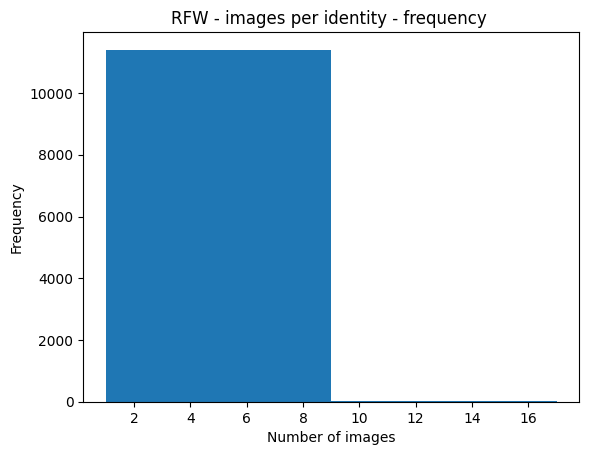

In [72]:
df_RFW['Identity'].value_counts()
# plot amount of the same identity
df_RFW['Identity'].value_counts().plot(kind='hist', bins=2)
plt.xlabel('Number of images')
plt.title('RFW - images per identity - frequency ')
plt.show()


In [73]:
print(df_RFW['Identity'].describe())
print(df_RFW['Identity'].value_counts().mean())

count        40522
unique       11416
top       m.0bk56n
freq            17
Name: Identity, dtype: object
3.5495795374912404


## Plotting the distribution

In [74]:
def plot_demographic_distribution(df, title, column="Age", bins=30, color="skyblue", figsize=(10, 6)):
    """
    Plots an improved histogram with a kernel density estimate for the specified column.

    Parameters:
    - df: Pandas DataFrame.
    - column: str, default "Age"
        The column name to be used for the histogram.
    - bins: int, default 30
        The number of bins to use for the histogram.
    - color: str, default "skyblue"
        The color of the histogram bars.
    - figsize: tuple, default (10, 6)
        The dimensions for the figure size.
    """
    plt.figure(figsize=figsize)  # Set figure size
    sns.histplot(data=df, x=column, bins=bins, color=color, kde=True)  # Histogram with KDE
    plt.title(f"{column} Distribution - {title}")  # Dynamic title based on the column name
    plt.xlabel(column)  # Label for the x-axis
    plt.ylabel("Count")  # Label for the y-axis
    plt.xticks(rotation=-45)  # Rotate x-axis labels
    plt.grid(False)  # Disable grid lines for cleaner look

    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()


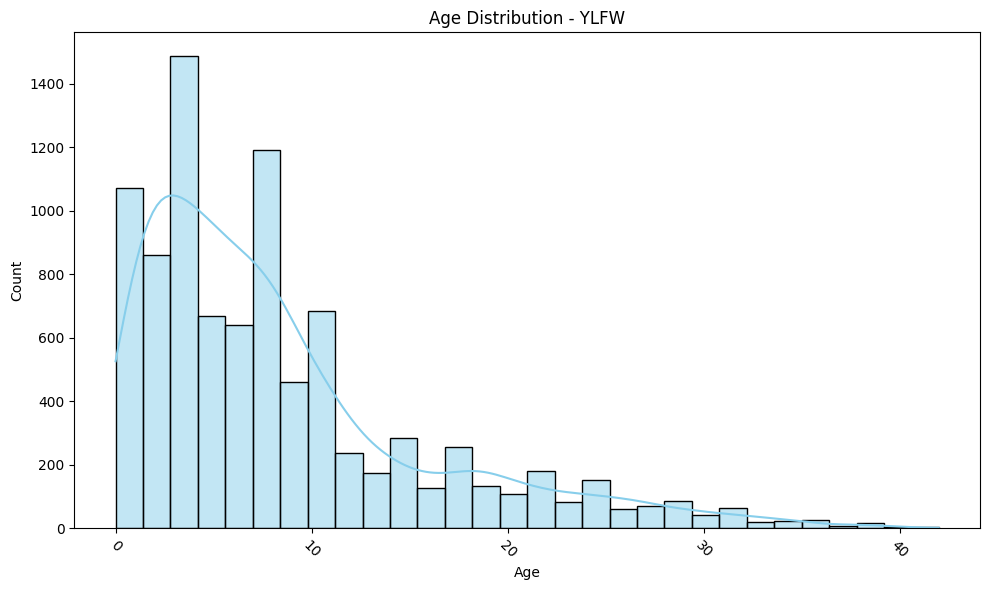

In [75]:
plot_demographic_distribution(df_YLFW, 'YLFW', column="Age", bins=30, color="skyblue", figsize=(10, 6))

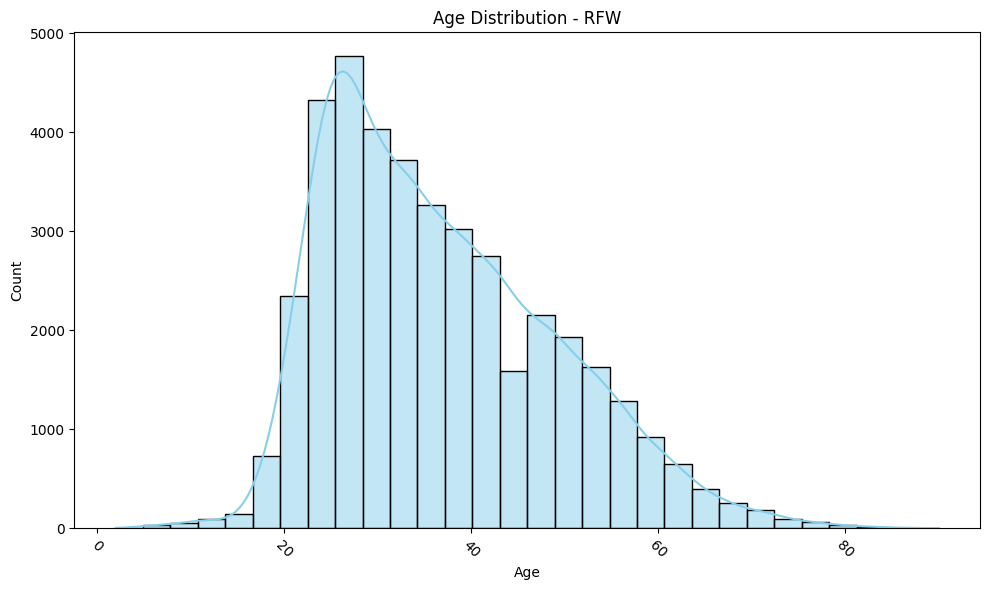

In [76]:
plot_demographic_distribution(df_RFW,'RFW', column="Age", bins=30, color="skyblue", figsize=(10, 6))

### Childrens ages

In [77]:
def plot_age_group_distribution(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')
    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


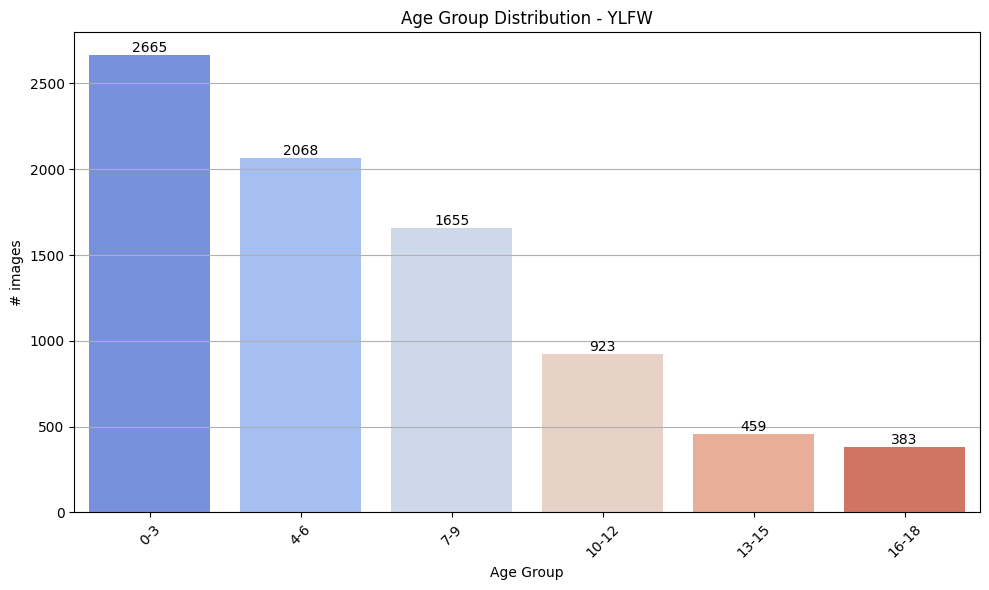

,Age,index_full,Identity,Ethnicity,image_id,Age Group
Indian_40_34,0,Indian_40_34,Indian_40,Indian,34,0-3
Caucasian_134_4,0,Caucasian_134_4,Caucasian_134,Caucasian,4,0-3
Caucasian_1276_4,0,Caucasian_1276_4,Caucasian_1276,Caucasian,4,0-3
Asian_624_4,0,Asian_624_4,Asian_624,Asian,4,0-3
Caucasian_1001_3,0,Caucasian_1001_3,Caucasian_1001,Caucasian,3,0-3
...,...,...,...,...,...,...
Indian_330_1,40,Indian_330_1,Indian_330,Indian,1,NaN
Asian_531_0,40,Asian_531_0,Asian_531,Asian,0,NaN
Indian_440_0,41,Indian_440_0,Indian_440,Indian,0,NaN
Indian_287_22,42,Indian_287_22,Indian_287,Indian,22,NaN


In [78]:
plot_age_group_distribution(df_YLFW, 'YLFW')

In [79]:
df_RFW

,Ethnicity,face_id,Age,index_full,Identity,image_id
0,African,0001,38,m.010lz5_0001,m.010lz5,0001
1,African,0002,29,m.010lz5_0002,m.010lz5,0002
2,African,0003,37,m.010lz5_0003,m.010lz5,0003
3,African,0001,40,m.011y5k_0001,m.011y5k,0001
4,African,0002,43,m.011y5k_0002,m.011y5k,0002
...,...,...,...,...,...,...
40517,Indian,0003,25,m.0vshsz9_0003,m.0vshsz9,0003
40518,Indian,0001,38,m.0_4pw_0001,m.0_4pw,0001
40519,Indian,0002,64,m.0_4pw_0002,m.0_4pw,0002
40520,Indian,0003,37,m.0_4pw_0003,m.0_4pw,0003


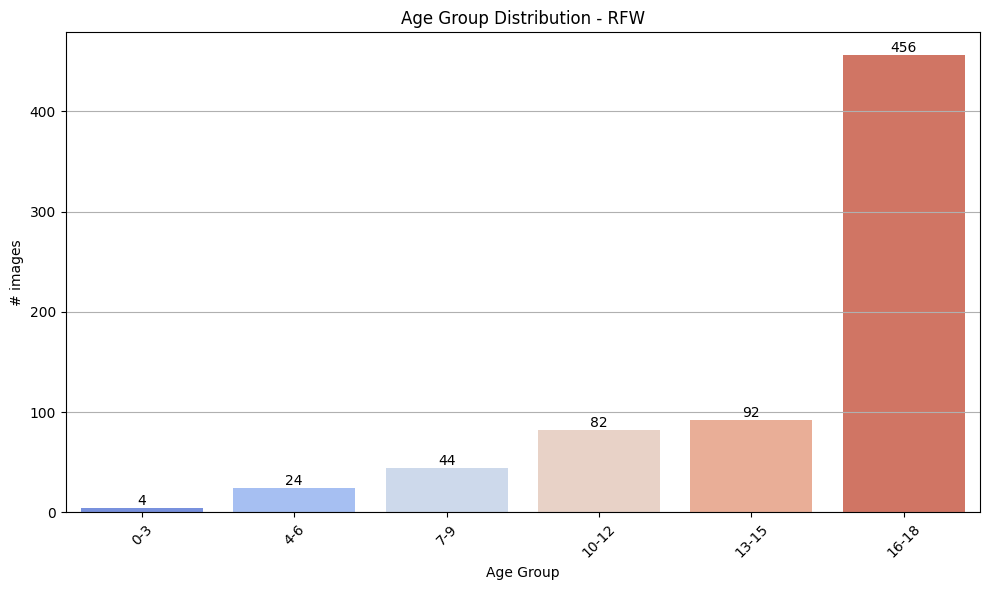

,Ethnicity,face_id,Age,index_full,Identity,image_id,Age Group
0,African,0001,38,m.010lz5_0001,m.010lz5,0001,NaN
1,African,0002,29,m.010lz5_0002,m.010lz5,0002,NaN
2,African,0003,37,m.010lz5_0003,m.010lz5,0003,NaN
3,African,0001,40,m.011y5k_0001,m.011y5k,0001,NaN
4,African,0002,43,m.011y5k_0002,m.011y5k,0002,NaN
...,...,...,...,...,...,...,...
40517,Indian,0003,25,m.0vshsz9_0003,m.0vshsz9,0003,NaN
40518,Indian,0001,38,m.0_4pw_0001,m.0_4pw,0001,NaN
40519,Indian,0002,64,m.0_4pw_0002,m.0_4pw,0002,NaN
40520,Indian,0003,37,m.0_4pw_0003,m.0_4pw,0003,NaN


In [80]:
plot_age_group_distribution(df_RFW, 'RFW')

# YLFW and RFW combined

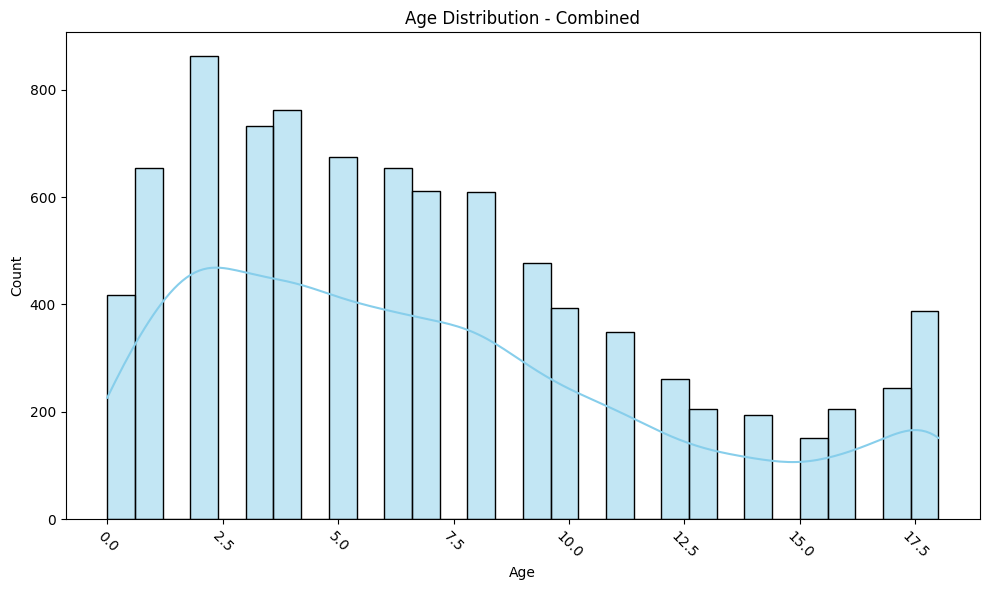

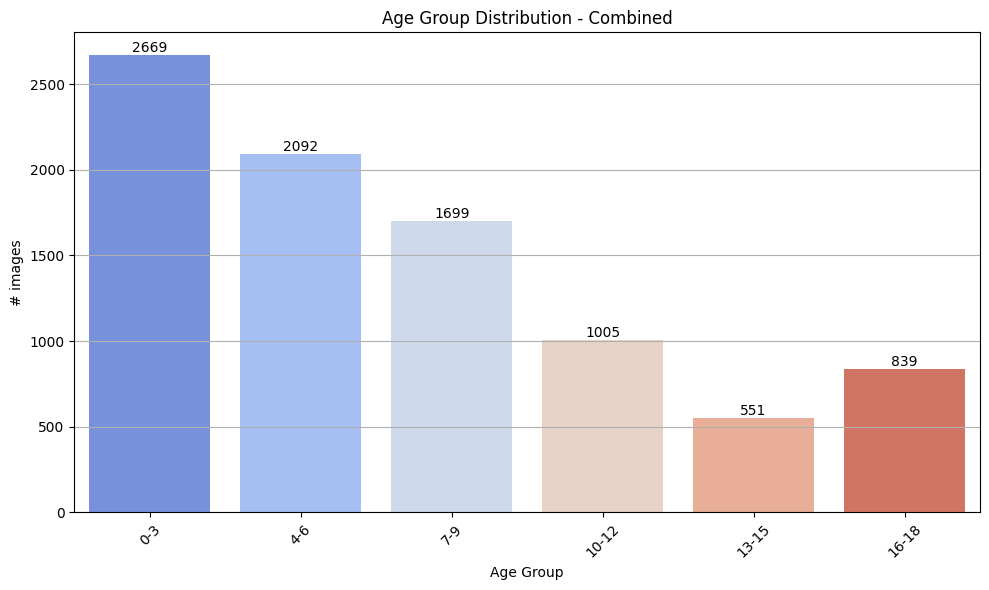

,Age,index_full,Identity,Ethnicity,image_id,Age Group,face_id
Indian_40_34,0,Indian_40_34,Indian_40,Indian,34,0-3,NaN
Caucasian_1030_18,0,Caucasian_1030_18,Caucasian_1030,Caucasian,18,0-3,NaN
Asian_232_25,0,Asian_232_25,Asian_232,Asian,25,0-3,NaN
Caucasian_518_9,0,Caucasian_518_9,Caucasian_518,Caucasian,9,0-3,NaN
Asian_290_2,0,Asian_290_2,Asian_290,Asian,2,0-3,NaN
...,...,...,...,...,...,...,...
8808,18,m.0g1my2_0003,m.0g1my2,African,0003,16-18,0003
9002,18,m.0gfhg0w_0003,m.0gfhg0w,African,0003,16-18,0003
9058,18,m.0gh79sg_0002,m.0gh79sg,African,0002,16-18,0002
8523,18,m.0d_d7t_0004,m.0d_d7t,African,0004,16-18,0004


In [81]:
# combine the two dataframes

df_combined = pd.concat([df_YLFW, df_RFW])
df_combined = df_combined.dropna(subset=['Age Group'])
df_combined = df_combined.sort_values(by='Age')

plot_demographic_distribution(df_combined, 'Combined', column="Age", bins=30, color="skyblue", figsize=(10, 6))

plot_age_group_distribution(df_combined, 'Combined')


# Mated and non-meated

A function that counts images per identity and if there are more than one image for the identity 

In [82]:
print(df_combined['Identity'].value_counts())

# add value_counts to the dataframe to each identity
df_combined['Identity Count'] = df_combined['Identity'].map(df_combined['Identity'].value_counts())

# for each identity, get the mean age of all their value_counts
df_combined['Mean Age'] = df_combined.groupby('Identity')['Age'].transform('mean')


Indian_602     16
Indian_528     14
Indian_484     13
African_113    12
Indian_278     12
               ..
Indian_279      1
African_198     1
African_100     1
Asian_652       1
m.0r8ntwm       1
Name: Identity, Length: 3208, dtype: int64


In [83]:
# adding a column that is a 1 if there are 2 or more images per identity and 0 if there is only one image
df_combined['Mated'] = np.where(df_combined['Identity Count'] > 1, 1, 0)
df_combined['Mated'].value_counts()

1    8002
0     853
Name: Mated, dtype: int64

In [84]:
df_combined['Identity Count'].value_counts()

# non-mated : count af 1-taller burde passe med 855

3     2028
4     1704
2     1646
5     1030
1      853
6      666
7      378
8      216
9      108
10      80
11      55
12      48
16      16
14      14
13      13
Name: Identity Count, dtype: int64

# Plot: number of images in each age group colored by mated 


In [85]:
# number of images in each age group colored by mated

def plot_age_group_distribution_mated(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x='Age Group', hue='Mated', palette='coolwarm')
    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df

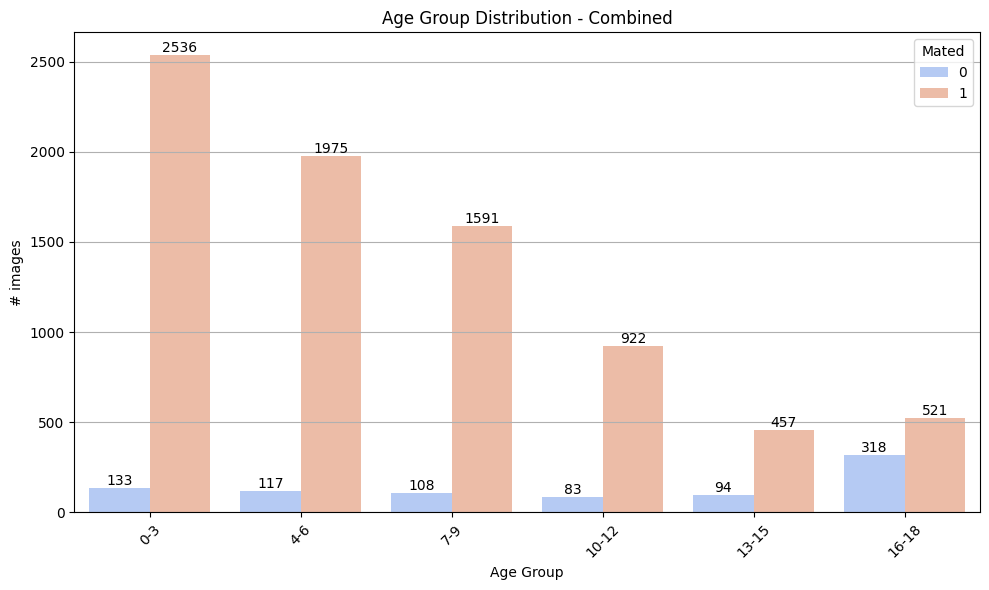

,Age,index_full,Identity,Ethnicity,image_id,Age Group,face_id,Identity Count,Mean Age,Mated
Indian_40_34,0,Indian_40_34,Indian_40,Indian,34,0-3,NaN,10,2.300000,1
Caucasian_1030_18,0,Caucasian_1030_18,Caucasian_1030,Caucasian,18,0-3,NaN,2,0.000000,1
Asian_232_25,0,Asian_232_25,Asian_232,Asian,25,0-3,NaN,4,1.750000,1
Caucasian_518_9,0,Caucasian_518_9,Caucasian_518,Caucasian,9,0-3,NaN,3,1.333333,1
Asian_290_2,0,Asian_290_2,Asian_290,Asian,2,0-3,NaN,3,1.333333,1
...,...,...,...,...,...,...,...,...,...,...
8808,18,m.0g1my2_0003,m.0g1my2,African,0003,16-18,0003,1,18.000000,0
9002,18,m.0gfhg0w_0003,m.0gfhg0w,African,0003,16-18,0003,1,18.000000,0
9058,18,m.0gh79sg_0002,m.0gh79sg,African,0002,16-18,0002,1,18.000000,0
8523,18,m.0d_d7t_0004,m.0d_d7t,African,0004,16-18,0004,1,18.000000,0


In [86]:
plot_age_group_distribution_mated(df_combined, 'Combined')

# Plot: number of images per identity



In [87]:
df_YLFW.head()

,Age,index_full,Identity,Ethnicity,image_id,Age Group
Indian_40_34,0,Indian_40_34,Indian_40,Indian,34,0-3
Caucasian_134_4,0,Caucasian_134_4,Caucasian_134,Caucasian,4,0-3
Caucasian_1276_4,0,Caucasian_1276_4,Caucasian_1276,Caucasian,4,0-3
Asian_624_4,0,Asian_624_4,Asian_624,Asian,4,0-3
Caucasian_1001_3,0,Caucasian_1001_3,Caucasian_1001,Caucasian,3,0-3


In [88]:
# count identities
print(df_YLFW['Identity'].value_counts())

#count unique identities
print(df_YLFW['Identity'].nunique())


Indian_602      16
Indian_528      14
Indian_484      13
Indian_613      13
African_318     12
                ..
Indian_425       1
Caucasian_76     1
Caucasian_9      1
Caucasian_67     1
Indian_440       1
Name: Identity, Length: 3042, dtype: int64
3042


In [89]:
image_counts = df_YLFW['Identity'].value_counts().reset_index()
image_counts.columns = ['Identity', 'Image Count']


In [90]:
def plot_images_per_identity_distribution(df, title, figsize=(10, 6)):
    """
    Plots the distribution of the number of images per identity within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Identity' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Count the number of images per identity
    image_counts = df['Identity'].value_counts().reset_index()
    image_counts.columns = ['Identity', 'Image Count']

    # Create the plot
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=image_counts, x='Identity', y='Image Count', palette='coolwarm')
    plt.title(f"Number of Images per Identity - {title}")
    plt.xlabel("Identity")
    plt.ylabel("Number of Images")
    plt.xticks([])  # Hide x-axis ticks
    plt.grid(axis='y')

    # Show the plot with a better layout
    plt.tight_layout()
    plt.show()


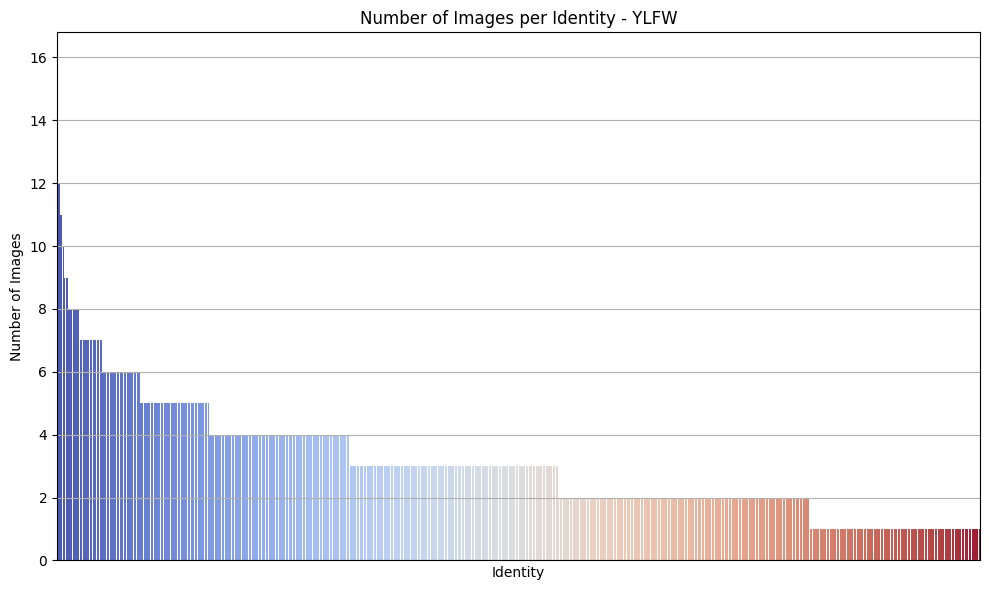

In [91]:
plot_images_per_identity_distribution(df_YLFW, 'YLFW')

# Plot: number of images per identity for each race

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_images_per_identity_per_race_distribution(df,title, figsize=(10, 6)):
    """
    Plots the distribution of the number of images per identity, grouped by race, within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Identity' column with race and identity information.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Extract race from the 'Identity' column
    df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])

    # Count the number of images per identity per race
    image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')

    # Sort the DataFrame for better visualization
    image_counts.sort_values(by=['Race', 'Image Count'], ascending=[True, False], inplace=True)

    # Create the plot
    plt.figure(figsize=figsize)
    sns.barplot(data=image_counts, x='Identity', y='Image Count', hue='Race', palette='coolwarm')
    plt.title(f"Number of Images per Identity per Race - {title}")
    plt.xlabel("Identity")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')

    # Hide x-axis labels to avoid clutter
    plt.xticks([])

    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()


### Denne herunder tager lang tid 

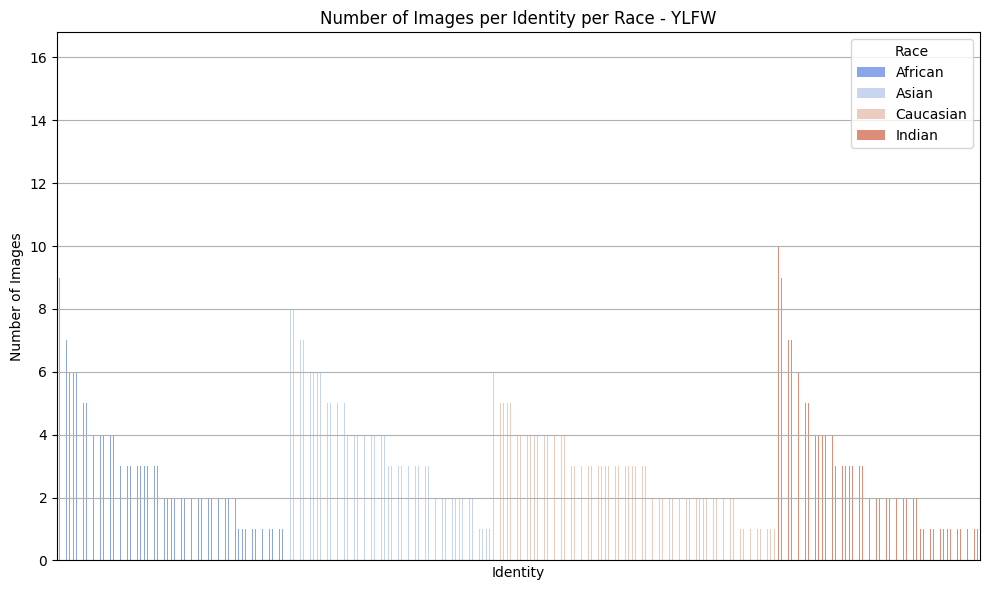

In [93]:
plot_images_per_identity_per_race_distribution(df_YLFW, 'YLFW')

In [94]:
df = df_YLFW
df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])
image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')
image_counts.sort_values(by=['Race', 'Image Count'], ascending=[True, False], inplace=True)
print(image_counts.head())

# drop all rows with image count 1
# These images are usefull in the open-set identification task, but not in the closed-set identification task
image_counts = image_counts[image_counts['Image Count'] > 1]
print(image_counts.head())

        Race     Identity  Image Count
16   African  African_113           12
188  African  African_285           12
225  African  African_318           12
223  African  African_316           11
94   African  African_191           10
        Race     Identity  Image Count
16   African  African_113           12
188  African  African_285           12
225  African  African_318           12
223  African  African_316           11
94   African  African_191           10


In [95]:
# Extract race from the 'Identity' column
df = df_YLFW
df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])

# Count the number of images per identity per race
image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')
image_counts.head()

,Race,Identity,Image Count
0,African,African_0,2
1,African,African_1,2
2,African,African_10,4
3,African,African_100,2
4,African,African_101,2


In [96]:
# boxplot of number of images peridentity per race
def plot_boxplot_images_per_identity_per_race(df,title, figsize=(10, 6)):
    """
    Plots a boxplot showing the distribution of the number of images per identity, grouped by race,
    within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Identity' column with race and identity information.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Extract race from the 'Identity' column
    df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])

    # Count the number of images per identity per race
    image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')

    # excluding the ones 1 image per identity
    image_counts = image_counts[image_counts['Image Count'] > 1]

    # Create the boxplot
    plt.figure(figsize=figsize)
    sns.boxplot(data=image_counts, x='Race', y='Image Count', palette='coolwarm')
    plt.title(f"Distribution of Images per Identity per Race - {title}")
    plt.xlabel("Race")
    plt.ylabel("Number of Images")

    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()


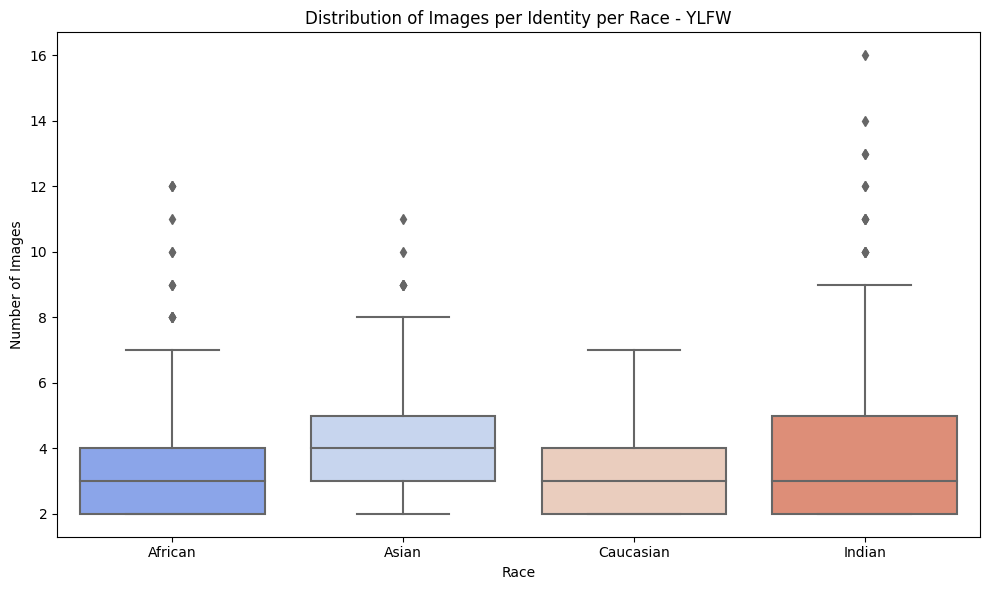

In [97]:
plot_boxplot_images_per_identity_per_race(df_YLFW, 'YLFW')